Advanced Python Assignment by Aariyan Sir

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\Python\20-hour-Python\Advanced Python\dataset_adv.csv")

df.head()

,OrderID,Date,Customer,Product,Amount
0,1,15-01-2024,Raj,Laptop,50000
1,2,20-01-2024,Meera,Phone,30000
2,3,10-02-2024,Raj,Laptop,55000
3,4,15-02-2024,Priya,Tablet,25000
4,5,05-03-2024,Meera,Phone,32000


In [3]:
df["Date"] = pd.to_datetime(df["Date"])
print(df["Date"].dtype)

datetime64[ns]


C:\Users\Rashmi\AppData\Local\Temp\ipykernel_14344\3475226320.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


In [4]:
df["Month"] = df["Date"].dt.month_name()
df.head()

,OrderID,Date,Customer,Product,Amount,Month
0,1,2024-01-15,Raj,Laptop,50000,January
1,2,2024-01-20,Meera,Phone,30000,January
2,3,2024-02-10,Raj,Laptop,55000,February
3,4,2024-02-15,Priya,Tablet,25000,February
4,5,2024-03-05,Meera,Phone,32000,March


In [5]:
monthly = ["January", "February", "March", "April", "May","June", "July", "August", "September", "October", "November", "December"]
df["Month"] = pd.Categorical(df["Month"],categories=monthly,ordered=True)
df.head()

,OrderID,Date,Customer,Product,Amount,Month
0,1,2024-01-15,Raj,Laptop,50000,January
1,2,2024-01-20,Meera,Phone,30000,January
2,3,2024-02-10,Raj,Laptop,55000,February
3,4,2024-02-15,Priya,Tablet,25000,February
4,5,2024-03-05,Meera,Phone,32000,March


In [6]:
pivot_multi_agg = df.pivot_table(index="Month", columns="Product", values=["Amount", "OrderID"],aggfunc= {"Amount":"sum", "OrderID":"count"})

C:\Users\Rashmi\AppData\Local\Temp\ipykernel_14344\2595573814.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_multi_agg = df.pivot_table(index="Month", columns="Product", values=["Amount", "OrderID"],aggfunc= {"Amount":"sum", "OrderID":"count"})


In [7]:
total_revenue = df.groupby(df["Month"]).agg({"Amount": "sum"})
print(total_revenue)

C:\Users\Rashmi\AppData\Local\Temp\ipykernel_14344\797153272.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_revenue = df.groupby(df["Month"]).agg({"Amount": "sum"})


           Amount
Month            
January     80000
February    80000
March       89000
April      117000
May             0
June            0
July            0
August          0
September       0
October         0
November        0
December        0


In [8]:
total_sales = df.groupby(df["Customer"]).agg({"Amount":"sum"})
print(total_sales)

          Amount
Customer        
Arjun      27000
Meera      93000
Priya      85000
Raj       161000


In [9]:
Avg_order = df.groupby(df["Product"]).agg({"Amount":"mean"})
print(Avg_order)

          Amount
Product         
Laptop   55000.0
Phone    30750.0
Tablet   26000.0


In [10]:
df["Rolling_Avg"] = df["Amount"].rolling(window=3).mean()
print(df["Rolling_Avg"])

0             NaN
1             NaN
2    45000.000000
3    36666.666667
4    37333.333333
5    28000.000000
6    29666.666667
7    39000.000000
8    38666.666667
9    39000.000000
Name: Rolling_Avg, dtype: float64


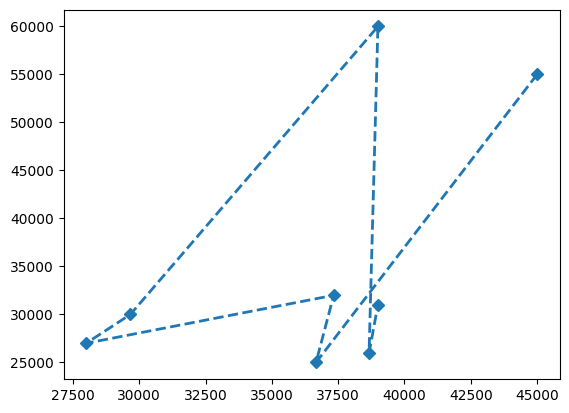

In [11]:
plt.plot(df["Rolling_Avg"],df["Amount"], marker="D", linewidth = 2, linestyle="--")
plt.show()

In [12]:
df["Growth"] = df["Amount"].pct_change()*100
print(df["Growth"])

0           NaN
1    -40.000000
2     83.333333
3    -54.545455
4     28.000000
5    -15.625000
6     11.111111
7    100.000000
8    -56.666667
9     19.230769
Name: Growth, dtype: float64


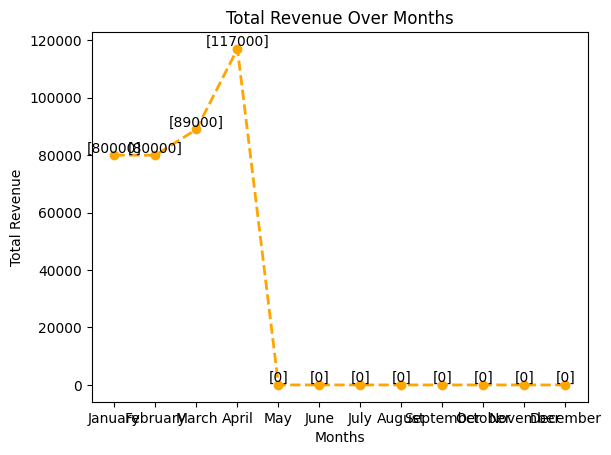

In [13]:
plt.plot(total_revenue.index, total_revenue["Amount"], marker="o", linewidth=2, linestyle="--",color="orange"   )
plt.title("Total Revenue Over Months")
plt.xlabel("Months")
plt.ylabel("Total Revenue")
for i,val in enumerate(total_revenue.values):
    plt.text(i,val+1000,str(val), ha="center")

plt.show()

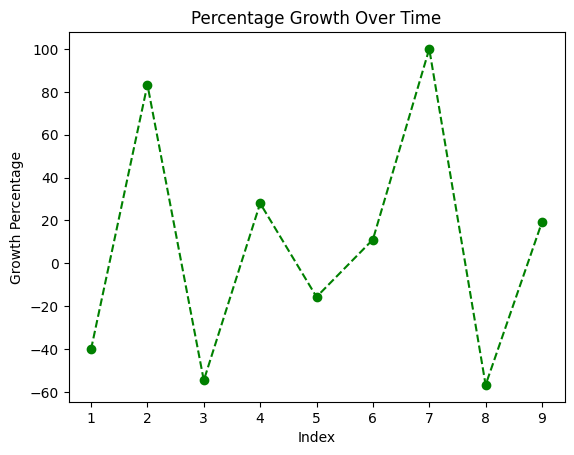

In [14]:
plt.plot(df["Growth"], marker="o", linestyle="--", color="g")
plt.title("Percentage Growth Over Time")
plt.xlabel("Index")
plt.ylabel("Growth Percentage")
plt.show()

In [15]:
total_rev = total_revenue["Amount"].sum()
print(f"Total Revenue: {total_rev}")
total_sal = df.count()["OrderID"]
print(f"Total Sales: {total_sal}")
top_cust = total_sales["Amount"].idxmax()
print(f"Top Customer: {top_cust}")
top_prod = Avg_order["Amount"].idxmax()
print(f"Top Product: {top_prod}")


Total Revenue: 366000
Total Sales: 10
Top Customer: Raj
Top Product: Laptop


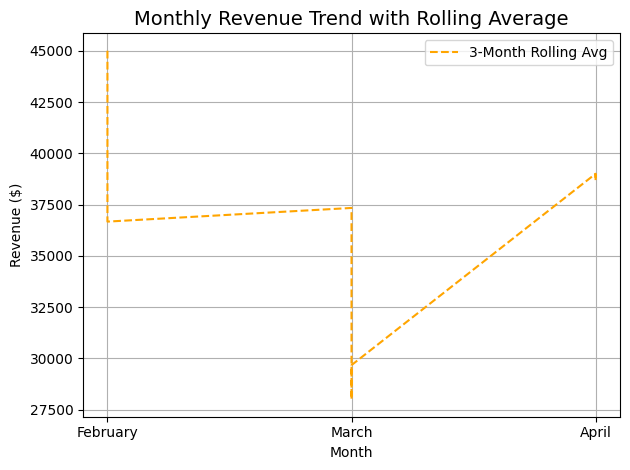

In [17]:
plt.plot(df['Month'], df['Rolling_Avg'], linestyle='--', color='orange', label='3-Month Rolling Avg')
plt.title('Monthly Revenue Trend with Rolling Average', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()